In [38]:
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

### Generate the Data Set

In [39]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [40]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([0.8225898  0.66158056], shape=(2,), dtype=float32) 
label: tf.Tensor([3.592711], shape=(1,), dtype=float32)


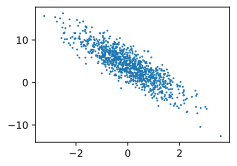

In [41]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

### Reading the Dataset

In [42]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [43]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[-1.0809771  -0.77139074]
 [-0.418501    0.06475113]
 [ 0.20679654  0.32282847]
 [-0.31032035  0.51597416]
 [ 0.26460046 -1.5548508 ]
 [-0.24963234 -0.53874797]
 [-2.4298694   0.67988145]
 [ 0.32300064  0.09585354]
 [ 1.1915219   0.5313742 ]
 [ 0.596501    0.9415067 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 4.658703 ]
 [ 3.1317916]
 [ 3.5071697]
 [ 1.8219402]
 [10.040698 ]
 [ 5.52607  ]
 [-2.955187 ]
 [ 4.5185366]
 [ 4.7746286]
 [ 2.1896963]], shape=(10, 1), dtype=float32)


###  Initializing Model Parameters

In [44]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

### Defining the Model

In [45]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return tf.matmul(X, w) + b

### Defining the Loss Function

In [46]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

### Define Optimization Algorithm

In [47]:
def sgd(params, grads, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [48]:
### Training

In [49]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.000052
epoch 2, loss 0.000052
epoch 3, loss 0.000052
epoch 4, loss 0.000051
epoch 5, loss 0.000052
epoch 6, loss 0.000053
epoch 7, loss 0.000052
epoch 8, loss 0.000052
epoch 9, loss 0.000053
epoch 10, loss 0.000053
